<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [418]:
import geopandas as gpd

linkGit='https://github.com/Lulo-Vilcarano-MF/Evaluaci-n-Individual-1IAS21-05A1/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [419]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [420]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [421]:
import pandas as pd

DataLink='https://github.com/Lulo-Vilcarano-MF/Evaluaci-n-Individual-1IAS21-05A1/raw/refs/heads/main/FAOSTAT_data_en_9-12-2025.csv'

someData=pd.read_csv(DataLink, encoding='cp1252')
#someData = pd.read_csv(someDataLink, encoding='cp1252')

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       202 non-null    object 
 1   Domain            202 non-null    object 
 2   Area Code (M49)   202 non-null    int64  
 3   Country           202 non-null    object 
 4   Element Code      202 non-null    int64  
 5   Element           202 non-null    object 
 6   Item Code         202 non-null    int64  
 7   Item              202 non-null    object 
 8   Year Code         202 non-null    int64  
 9   Year              202 non-null    int64  
 10  Unit              202 non-null    object 
 11  Value             202 non-null    int64  
 12  Flag              202 non-null    object 
 13  Flag Description  202 non-null    object 
 14  sq_kmGJ           202 non-null    int64  
 15  sq_kmTJ           200 non-null    float64
 16  Region            202 non-null    object 
dt

## Pre Processing: Merging

In [422]:
someData.head()

,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,sq_kmGJ,sq_kmTJ,Region
0,BE,Bioenergy,4,Afghanistan,5852,Energy production,6525,Fuelwood,2022,2022,TJ,18558,X,Figure from external organization,652230000,652230.0,Asia
1,BE,Bioenergy,8,Albania,5852,Energy production,6525,Fuelwood,2022,2022,TJ,6155,X,Figure from external organization,28748000,28748.0,Europe
2,BE,Bioenergy,12,Algeria,5852,Energy production,6525,Fuelwood,2022,2022,TJ,741,X,Figure from external organization,2381740000,2381740.0,Africa
3,BE,Bioenergy,24,Angola,5852,Energy production,6525,Fuelwood,2022,2022,TJ,177651,X,Figure from external organization,1246700000,1246700.0,Africa
4,BE,Bioenergy,660,Anguilla,5852,Energy production,6525,Fuelwood,2022,2022,TJ,1,X,Figure from external organization,443000,443.0,Unknown


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging


In [423]:
countries.COUNTRY.head()

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan


In [424]:
someData.Country.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Anguilla


In [425]:
countries.rename(columns={'COUNTRY':'Country'},inplace=True)

In [426]:
countries['Country']=countries.Country.str.upper()

It is very unlikely the names are written the same. Let's verify:

Check here:

In [427]:
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

In [428]:
onlyDF # they did not find a match in the MAP GDF!

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Ascension, Saint Helena and Tristan da Cunha',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Taiwan Province of',
 'China, mainland',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland'

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [429]:
!pip install thefuzz

This is the basic idea:

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [430]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('BAHAMAS (THE)',onlyGDF)

('BAHAMAS', 90)

In [431]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(country, best(country,onlyGDF)) for country in onlyDF]

[('Bahamas', ('BAHAMAS', 100)),
 ('United States of America', ('UNITED STATES', 90)),
 ('Lithuania', ('LITHUANIA', 100)),
 ('North Macedonia', ('MACEDONIA', 90)),
 ('Czechia', ('CZECH REPUBLIC', 75)),
 ('Lesotho', ('LESOTHO', 100)),
 ('New Zealand', ('NEW ZEALAND', 100)),
 ('Tajikistan', ('TAJIKISTAN', 100)),
 ('Mauritius', ('MAURITIUS', 100)),
 ('Congo', ('CONGO', 100)),
 ('Jordan', ('JORDAN', 100)),
 ('Barbados', ('BARBADOS', 100)),
 ('Malawi', ('MALAWI', 100)),
 ("Lao People's Democratic Republic", ('CZECH REPUBLIC', 86)),
 ('Eswatini', ('INDIA', 68)),
 ('Kenya', ('KENYA', 100)),
 ('Japan', ('JAPAN', 100)),
 ('Luxembourg', ('LUXEMBOURG', 100)),
 ('Ascension, Saint Helena and Tristan da Cunha', ('TRINIDAD AND TOBAGO', 86)),
 ('Bosnia and Herzegovina', ('BOSNIA AND HERZEGOVINA', 100)),
 ('Cyprus', ('CYPRUS', 100)),
 ('Jamaica', ('JAMAICA', 100)),
 ('Denmark', ('DENMARK', 100)),
 ('Liechtenstein', ('LIECHTENSTEIN', 100)),
 ('Canada', ('CANADA', 100)),
 ('Suriname', ('SURINAME', 100)),


Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [432]:
#or
[(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]

[('Bahamas', 'BAHAMAS', 100),
 ('United States of America', 'UNITED STATES', 90),
 ('Lithuania', 'LITHUANIA', 100),
 ('North Macedonia', 'MACEDONIA', 90),
 ('Czechia', 'CZECH REPUBLIC', 75),
 ('Lesotho', 'LESOTHO', 100),
 ('New Zealand', 'NEW ZEALAND', 100),
 ('Tajikistan', 'TAJIKISTAN', 100),
 ('Mauritius', 'MAURITIUS', 100),
 ('Congo', 'CONGO', 100),
 ('Jordan', 'JORDAN', 100),
 ('Barbados', 'BARBADOS', 100),
 ('Malawi', 'MALAWI', 100),
 ("Lao People's Democratic Republic", 'CZECH REPUBLIC', 86),
 ('Eswatini', 'INDIA', 68),
 ('Kenya', 'KENYA', 100),
 ('Japan', 'JAPAN', 100),
 ('Luxembourg', 'LUXEMBOURG', 100),
 ('Ascension, Saint Helena and Tristan da Cunha', 'TRINIDAD AND TOBAGO', 86),
 ('Bosnia and Herzegovina', 'BOSNIA AND HERZEGOVINA', 100),
 ('Cyprus', 'CYPRUS', 100),
 ('Jamaica', 'JAMAICA', 100),
 ('Denmark', 'DENMARK', 100),
 ('Liechtenstein', 'LIECHTENSTEIN', 100),
 ('Canada', 'CANADA', 100),
 ('Suriname', 'SURINAME', 100),
 ('South Sudan', 'SOUTH SUDAN', 100),
 ('Croatia', '

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [433]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF])

,0,1,2
0,Bahamas,BAHAMAS,100
1,United States of America,UNITED STATES,90
2,Lithuania,LITHUANIA,100
3,North Macedonia,MACEDONIA,90
4,Czechia,CZECH REPUBLIC,75
...,...,...,...
197,Philippines,PHILIPPINES,100
198,Ghana,GHANA,100
199,Germany Fr,GERMANY,95
200,Palestine,PALESTINE,100


Let's sort by the column '2' (the third):

In [434]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(by=2)

,0,1,2
14,Eswatini,INDIA,68
59,R?nion,REUNION (FRANCE),68
4,Czechia,CZECH REPUBLIC,75
132,Cabo Verde,CAPE VERDE,80
156,Saint Lucia,ST. LUCIA,80
...,...,...,...
196,Tunisia,TUNISIA,100
197,Philippines,PHILIPPINES,100
198,Ghana,GHANA,100
200,Palestine,PALESTINE,100


In [435]:
# this is a {dictionary}
manualChanges={'SWAZILAND':'ESWATINI',
               'LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
               'SOUTH KOREA':'KOREA (THE REPUBLIC OF)',
               'WESTERN SAMOA':'SAMOA',
               "T?rkiye": "Türkiye",
               "C?te d'Ivoire": "Côte d'Ivoire",
               "R?union": "Réunion",
               "Czechia": "Czech Republic"
              }

countries.replace(to_replace={'Country':manualChanges},inplace=True)

In [436]:
merged = countries.merge(countries, on="Country", how="left")

Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

At this stage, we should recompute the differences:

In [437]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

An re run this code:

In [438]:
# keeping high scores

pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(2)

,0,1,2
59,R?nion,REUNION (FRANCE),68
4,Czechia,CZECH REPUBLIC,75
156,Saint Lucia,ST. LUCIA,80
132,Cabo Verde,CAPE VERDE,80
182,Timor-Leste,EAST TIMOR,81
...,...,...,...
196,Tunisia,TUNISIA,100
197,Philippines,PHILIPPINES,100
198,Ghana,GHANA,100
200,Palestine,PALESTINE,100


All this is correct now!

Let's prepare the changes:

In [439]:
# new {dictionary}
changesToDF={country: best(country,onlyGDF)[0] for country in onlyDF}
changesToDF

{'Bahamas': 'BAHAMAS',
 'United States of America': 'UNITED STATES',
 'Lithuania': 'LITHUANIA',
 'North Macedonia': 'MACEDONIA',
 'Czechia': 'CZECH REPUBLIC',
 'Lesotho': 'LESOTHO',
 'New Zealand': 'NEW ZEALAND',
 'Tajikistan': 'TAJIKISTAN',
 'Mauritius': 'MAURITIUS',
 'Congo': 'CONGO',
 'Jordan': 'JORDAN',
 'Barbados': 'BARBADOS',
 'Malawi': 'MALAWI',
 "Lao People's Democratic Republic": "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'Eswatini': 'ESWATINI',
 'Kenya': 'KENYA',
 'Japan': 'JAPAN',
 'Luxembourg': 'LUXEMBOURG',
 'Ascension, Saint Helena and Tristan da Cunha': 'TRINIDAD AND TOBAGO',
 'Bosnia and Herzegovina': 'BOSNIA AND HERZEGOVINA',
 'Cyprus': 'CYPRUS',
 'Jamaica': 'JAMAICA',
 'Denmark': 'DENMARK',
 'Liechtenstein': 'LIECHTENSTEIN',
 'Canada': 'CANADA',
 'Suriname': 'SURINAME',
 'South Sudan': 'SOUTH SUDAN',
 'Croatia': 'CROATIA',
 'Saint Vincent and the Grenadines': 'ST. VINCENT AND THE GRENADINES',
 'Germany': 'GERMANY',
 'Peru': 'PERU',
 'Venezuela (Bolivarian Republic of)

In [440]:
someData.replace(to_replace={'Country':changesToDF},inplace=True)

What is left to match?

In [441]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)
[(country, best(country,onlyGDF)) for country in onlyDF]

[]

Once you are here, merging can proceed:

In [442]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='Country')

And our GDF has social data now!

In [443]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Country           202 non-null    object  
 1   geometry          202 non-null    geometry
 2   Domain Code       202 non-null    object  
 3   Domain            202 non-null    object  
 4   Area Code (M49)   202 non-null    int64   
 5   Element Code      202 non-null    int64   
 6   Element           202 non-null    object  
 7   Item Code         202 non-null    int64   
 8   Item              202 non-null    object  
 9   Year Code         202 non-null    int64   
 10  Year              202 non-null    int64   
 11  Unit              202 non-null    object  
 12  Value             202 non-null    int64   
 13  Flag              202 non-null    object  
 14  Flag Description  202 non-null    object  
 15  sq_kmGJ           202 non-null    int64   
 16  sq_kmTJ           

We should save this map of countries and their indicators in a new file:

In [444]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)


In [445]:
# We will work with the whole world
world = theMapAndData.copy()
world.Region.value_counts()

,count
Region,
Africa,52
Unknown,38
Asia,38
Europe,34
North America,21
South America,10
Oceania,9


### Preprocessing: Filtering

<Axes: >

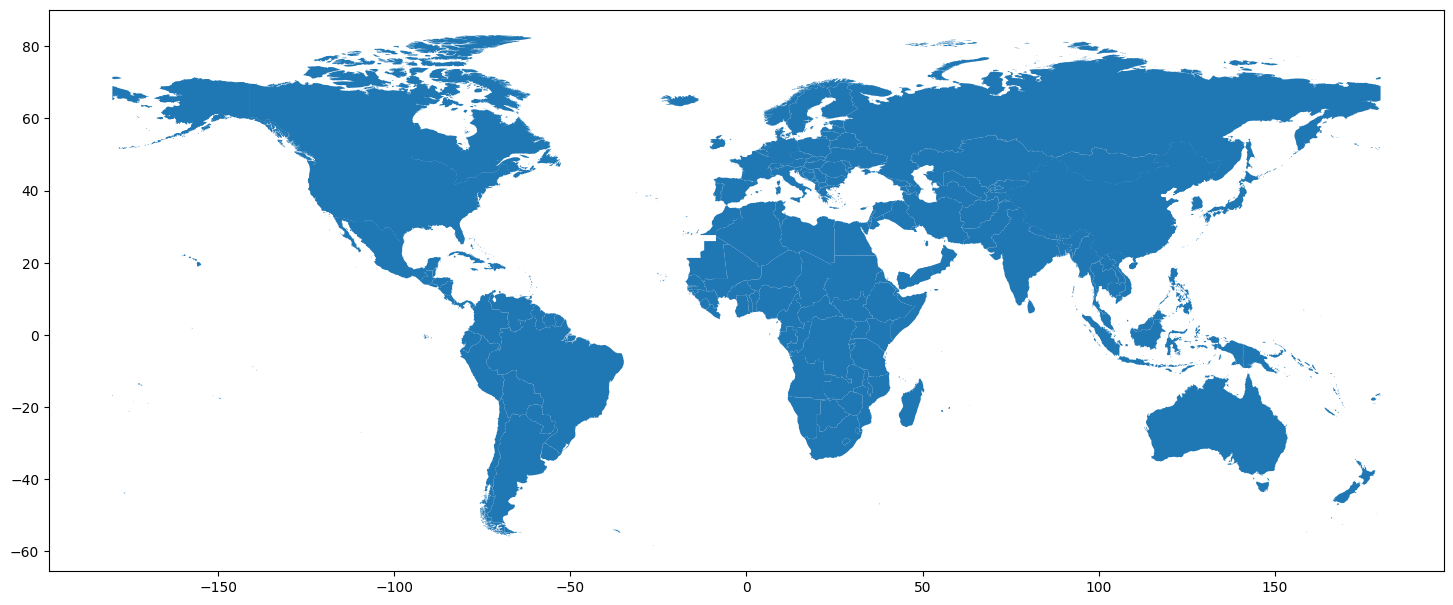

In [446]:
# then
theMapAndData.plot(figsize=(18, 14))



### Preprocessing: aggregating


In [447]:
# This is a DOT UNIT proposal, adapted for the world data

justDots=theMapAndData.copy()
dot_value = 1000
justDots['num_dots'] = (justDots['Value'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [448]:
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [449]:
justDots

1    0       POINT (62.35299 29.93696)
     1        POINT (62.7929 35.01517)
     2       POINT (63.37236 30.80121)
     3        POINT (63.40952 30.0933)
     4       POINT (63.60822 32.90792)
                       ...            
200  672    POINT (140.83774 -7.89418)
     673    POINT (140.83869 -7.90966)
     674    POINT (140.87186 -4.16891)
     675    POINT (140.92602 -3.07326)
     676    POINT (140.99267 -5.59615)
Name: sampled_points, Length: 30421, dtype: geometry

In [450]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [451]:
justDots.reset_index(drop=True, inplace=True)
world_dots=gpd.GeoDataFrame(geometry=justDots)
world_dots

,geometry
0,POINT (62.35299 29.93696)
1,POINT (62.7929 35.01517)
2,POINT (63.37236 30.80121)
3,POINT (63.40952 30.0933)
4,POINT (63.60822 32.90792)
...,...
30416,POINT (140.83774 -7.89418)
30417,POINT (140.83869 -7.90966)
30418,POINT (140.87186 -4.16891)
30419,POINT (140.92602 -3.07326)


Now you have a GDF:

In [452]:
world_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30421 entries, 0 to 30420
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  30421 non-null  geometry
dtypes: geometry(1)
memory usage: 237.8 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

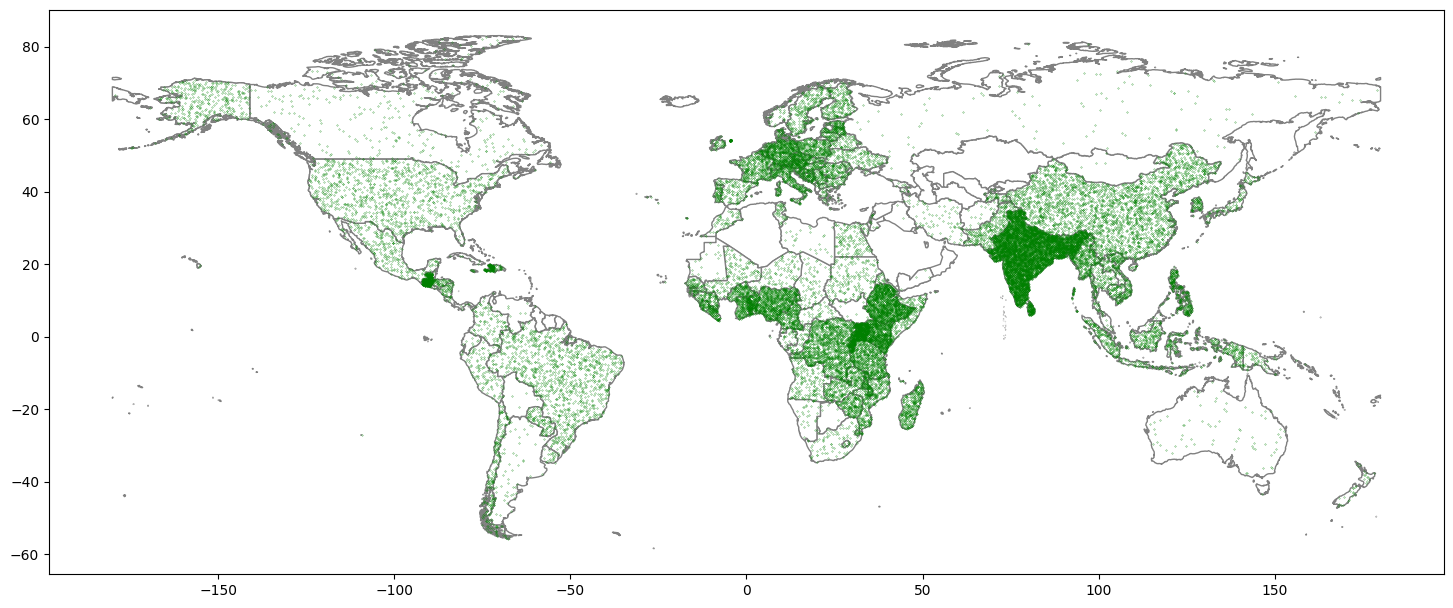

In [453]:
base=theMapAndData.plot(facecolor="white",#color of polygon fill
               edgecolor='grey', figsize=(18, 14)) #color of border
world_dots.plot(markersize=0.05, color='green',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

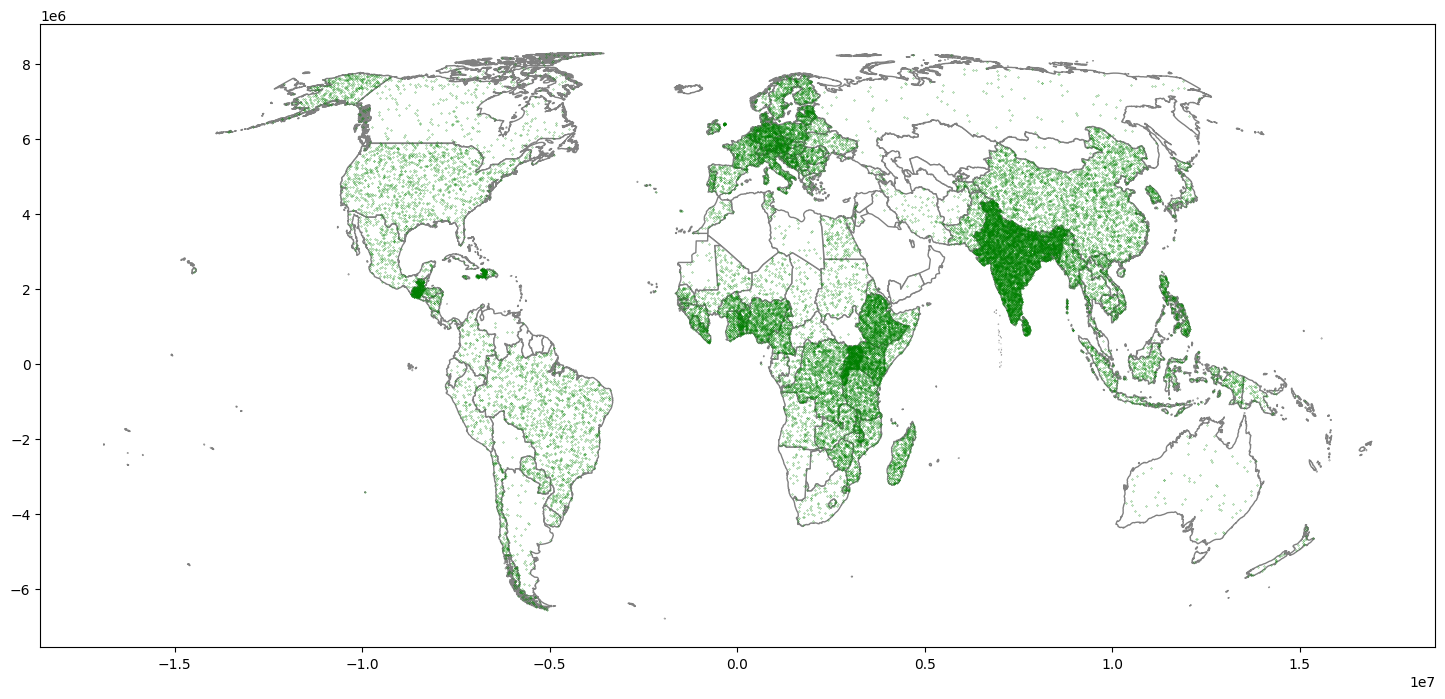

In [454]:
base=world.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey', figsize=(18, 14))
world_dots.to_crs(8857).plot(markersize=0.05, color='green',ax=base)

Let's keep the continent countries with that crs:

In [455]:
theMapAndData_8857 = theMapAndData.to_crs(8857)
world_dots_8857=world_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)


### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [456]:
theMapAndData_8857_centroids = theMapAndData_8857.copy()
_8857 = theMapAndData_8857[theMapAndData_8857['Region'] == 'theMapAndData']
theMapAndData
# theMapAndData_8857_centroids will have a new geometry:
theMapAndData_8857_centroids['geometry'] = theMapAndData_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [457]:
theMapAndData_8857_centroids['size'] = theMapAndData_8857_centroids['Value'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

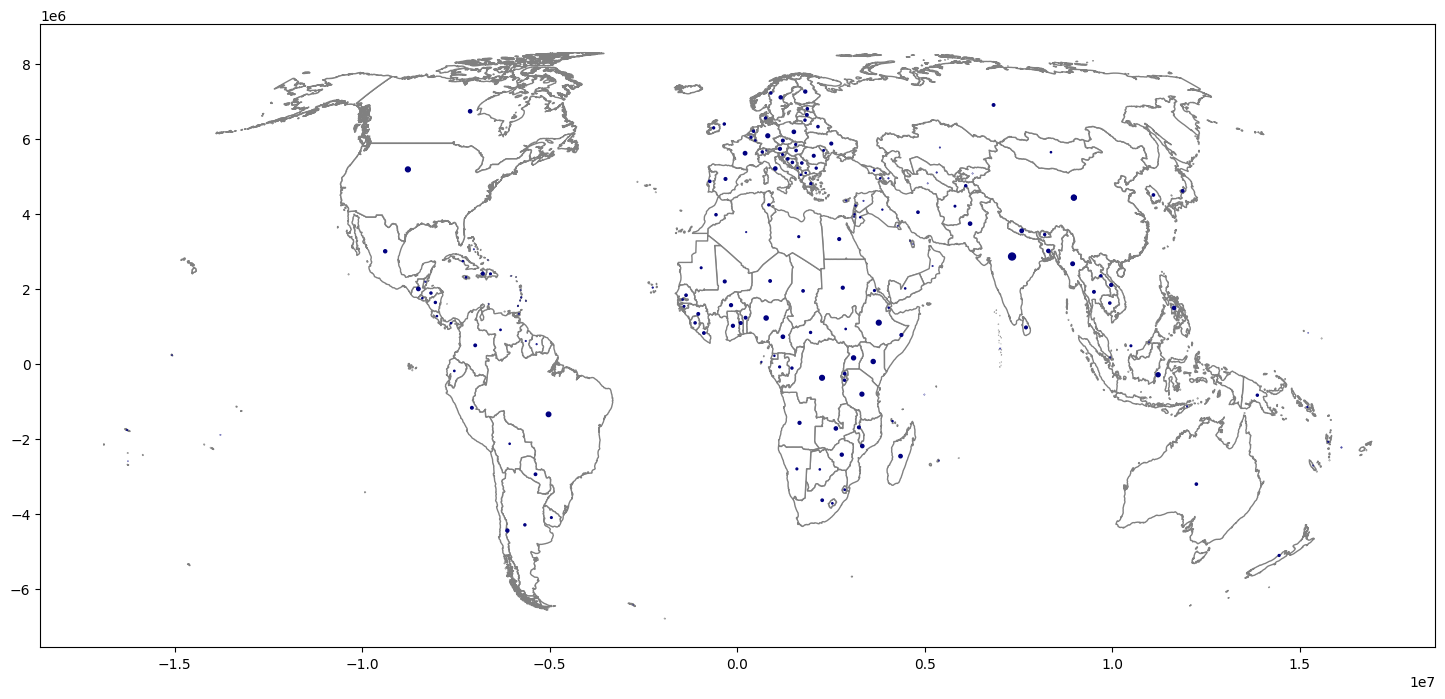

In [458]:
base=theMapAndData_8857.plot(facecolor="white", # Changed facecolor to blue
                      edgecolor='grey', figsize=(18, 14))
# Plot the centroids on top
theMapAndData_8857_centroids.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids['size'],
    color='navy' # Changed color to navy
)

In [459]:
!pip install mapclassify

Keep in mind that the standard way of computing centroids may bring some trouble. Let´s plot Seychelles:

In [460]:
base=theMapAndData_8857[theMapAndData_8857.Country=="SEYCHELLES"].explore()
theMapAndData_8857_centroids[theMapAndData_8857_centroids.Country=="SEYCHELLES"].explore(m=base,color="red")

A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [461]:
# replace the points
theMapAndData_8857_centroids["geometry"]=theMapAndData_8857.representative_point()

We will keep that last result.

In [462]:
base=theMapAndData_8857[theMapAndData_8857.Country=="SEYCHELLES"].explore()
theMapAndData_8857_centroids[theMapAndData_8857_centroids.Country=="SEYCHELLES"].explore(m=base,color="red")

### Preprocessing: Computing new columns


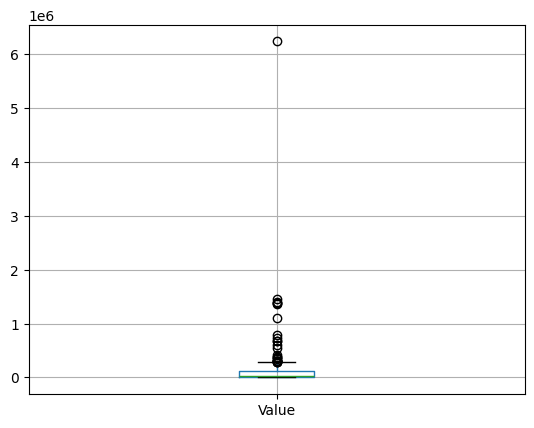

In [463]:
boxplotInfo=theMapAndData_8857_centroids.boxplot(column='Value',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [464]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([421455, 1108195, 298028, 1357594, 1388157, 1380987, 309242,
       1396178, 375463, 551412, 369926, 6226970, 290138, 723165, 338122,
       296834, 781872, 379482, 294466, 307613, 291342, 598751, 672274,
       1463629, 298618, 677365], dtype=object)

Then, these are the outlying countries:

In [465]:
theMapAndData_8857_centroids[theMapAndData_8857_centroids.Value.isin(outliers)]

,Country,geometry,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,sq_kmGJ,sq_kmTJ,Region,size
20,MYANMAR,POINT (8949132.657 2433783.263),BE,Bioenergy,104,5852,Energy production,6525,Fuelwood,2022,2022,TJ,421455,X,Figure from external organization,0,0.0,Asia,6.491957
25,BRAZIL,POINT (-4700709.502 -1764170.762),BE,Bioenergy,76,5852,Energy production,6525,Fuelwood,2022,2022,TJ,1108195,X,Figure from external organization,8515770000,8515770.0,South America,10.527084
30,CANADA,POINT (-8057335.615 6460418.072),BE,Bioenergy,124,5852,Energy production,6525,Fuelwood,2022,2022,TJ,298028,X,Figure from external organization,9984670000,9984670.0,North America,5.459194
35,DEMOCRATIC REPUBLIC OF THE CONGO,POINT (2150454.367 -516111.79),BE,Bioenergy,180,5852,Energy production,6525,Fuelwood,2022,2022,TJ,1357594,X,Figure from external organization,48670000,48670.0,Africa,11.651584
36,CHINA,POINT (8558589.424 4454406.546),BE,Bioenergy,159,5852,Energy production,6525,Fuelwood,2022,2022,TJ,1388157,X,Figure from external organization,9596960000,9596960.0,Asia,11.782007
37,CHINA,POINT (8558589.424 4454406.546),BE,Bioenergy,156,5852,Energy production,6525,Fuelwood,2022,2022,TJ,1380987,X,Figure from external organization,0,0.0,Unknown,11.751540
40,CAMEROON,POINT (1299556.828 944934.755),BE,Bioenergy,120,5852,Energy production,6525,Fuelwood,2022,2022,TJ,309242,X,Figure from external organization,475440000,475440.0,Africa,5.560953
60,ETHIOPIA,POINT (3713238.555 1171240.545),BE,Bioenergy,231,5852,Energy production,6525,Fuelwood,2022,2022,TJ,1396178,X,Figure from external organization,1104300000,1104300.0,Africa,11.815998
67,FRANCE,POINT (175396.764 5637422.087),BE,Bioenergy,250,5852,Energy production,6525,Fuelwood,2022,2022,TJ,375463,X,Figure from external organization,643801000,643801.0,Europe,6.127504
73,GERMANY,POINT (820014.651 6093052.18),BE,Bioenergy,276,5852,Energy production,6525,Fuelwood,2022,2022,TJ,551412,X,Figure from external organization,357022000,357022.0,Europe,7.425712


Knowing this information, we can create a column as outlier flag:

In [466]:
theMapAndData_8857_centroids['Value_outlier']=theMapAndData_8857_centroids.Value.isin(outliers)*1

## see
theMapAndData_8857_centroids

,Country,geometry,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,sq_kmGJ,sq_kmTJ,Region,size,Value_outlier
0,ARUBA (NETHERLANDS),POINT (-6627435.863 1600262.217),BE,Bioenergy,533,5852,Energy production,6525,Fuelwood,2022,2022,TJ,24,X,Figure from external organization,0,0.0,Unknown,0.048990,0
1,AFGHANISTAN,POINT (5737749.881 4223784.83),BE,Bioenergy,4,5852,Energy production,6525,Fuelwood,2022,2022,TJ,18558,X,Figure from external organization,652230000,652230.0,Asia,1.362278,0
2,ALGERIA,POINT (58149.408 3504624.452),BE,Bioenergy,12,5852,Energy production,6525,Fuelwood,2022,2022,TJ,741,X,Figure from external organization,2381740000,2381740.0,Africa,0.272213,0
3,AZERBAIJAN,POINT (4052504.835 4936297.741),BE,Bioenergy,31,5852,Energy production,6525,Fuelwood,2022,2022,TJ,643,X,Figure from external organization,86600000,86600.0,Asia,0.253574,0
4,ALBANIA,POINT (1690025.667 5046293.422),BE,Bioenergy,8,5852,Energy production,6525,Fuelwood,2022,2022,TJ,6155,X,Figure from external organization,28748000,28748.0,Europe,0.784538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,ZAMBIA,POINT (2407586.605 -1678163.786),BE,Bioenergy,894,5852,Energy production,6525,Fuelwood,2022,2022,TJ,298618,X,Figure from external organization,752618000,752618.0,Africa,5.464595,1
198,ZIMBABWE,POINT (2738721.618 -2417820.45),BE,Bioenergy,716,5852,Energy production,6525,Fuelwood,2022,2022,TJ,213166,X,Figure from external organization,390757000,390757.0,Africa,4.616990,0
199,SOUTH SUDAN,POINT (2780382.012 1002979.353),BE,Bioenergy,728,5852,Energy production,6525,Fuelwood,2022,2022,TJ,8348,X,Figure from external organization,644329000,644329.0,Africa,0.913674,0
200,INDONESIA,POINT (10855969.809 11510.466),BE,Bioenergy,360,5852,Energy production,6525,Fuelwood,2022,2022,TJ,677365,X,Figure from external organization,1904569000,1904569.0,Asia,8.230219,1


We can use that like this:

<Axes: >

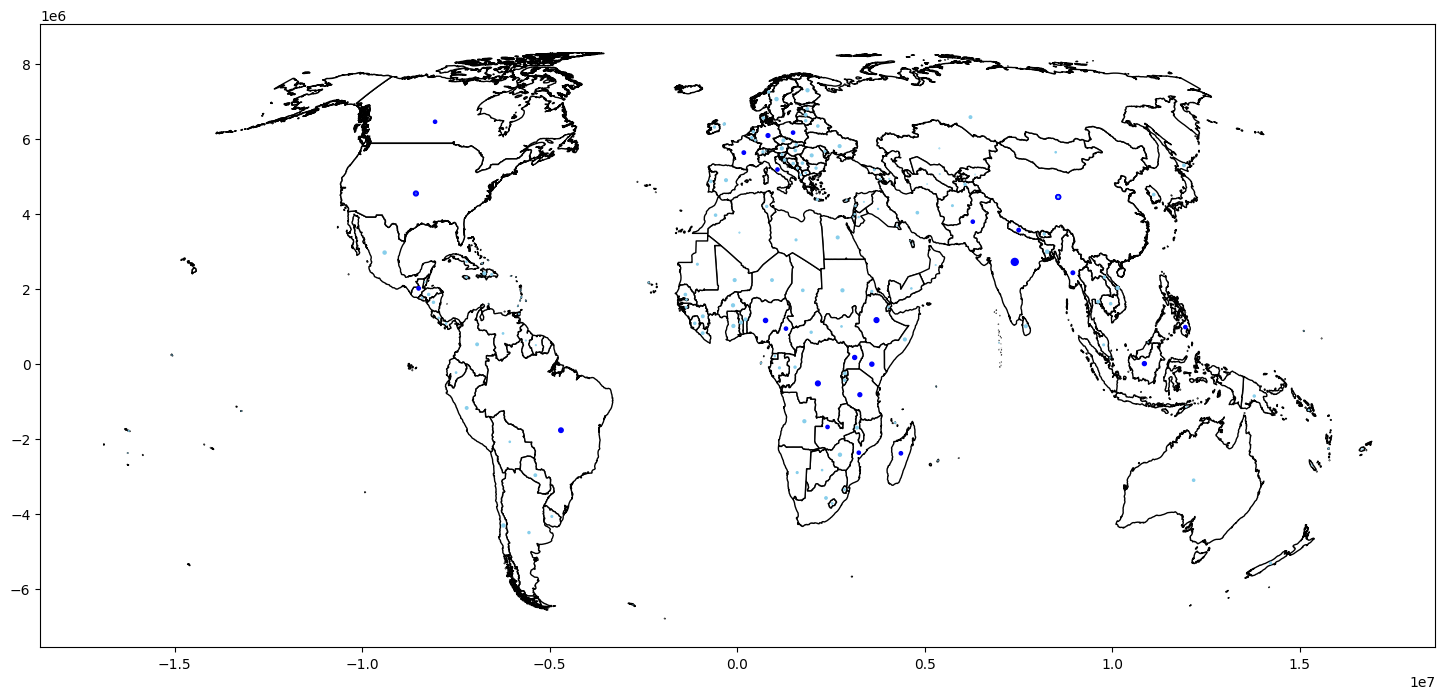

In [467]:
base = theMapAndData_8857.plot(color='white', edgecolor='black', figsize=(18,14))

# Define your color map
mapcolor = {1: 'blue', 0: 'skyblue'}

# Plot the centroids on top
theMapAndData_8857_centroids.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids['size'],
    color=theMapAndData_8857_centroids['Value_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [468]:
# Create explicit copies of the DataFrames
theMapAndData_8857_centroids_out = theMapAndData_8857_centroids[theMapAndData_8857_centroids.Value_outlier==1].copy()
theMapAndData_8857_centroids_no_out = theMapAndData_8857_centroids[theMapAndData_8857_centroids.Value_outlier==0].copy()


2. Compute sizes in each:

In [469]:
theMapAndData_8857_centroids_out['size'] = theMapAndData_8857_centroids_out['Value'].apply(lambda x: x**0.5 / 50)
theMapAndData_8857_centroids_no_out['size'] = theMapAndData_8857_centroids_no_out['Value'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

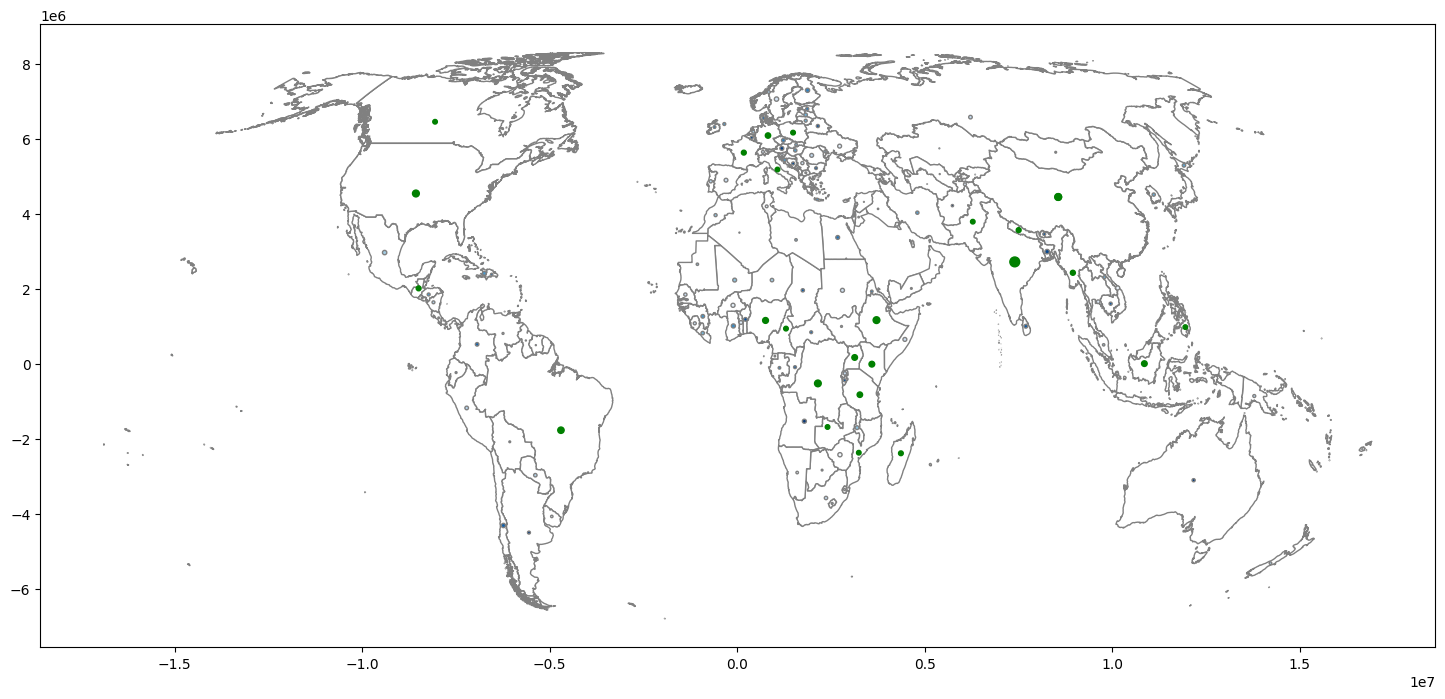

In [470]:
base=theMapAndData_8857.plot(color='white', edgecolor='grey',figsize=(18,14))

theMapAndData_8857_centroids_no_out.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids_no_out['size'],
    edgecolor='grey',
    c=theMapAndData_8857_centroids_no_out['size'],
    cmap='Blues_r'
)
theMapAndData_8857_centroids_out.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids_out['size'],
    color='green'
)

# Thematics: Choropleths

* This is **NOT** a choropleth:


<Axes: >

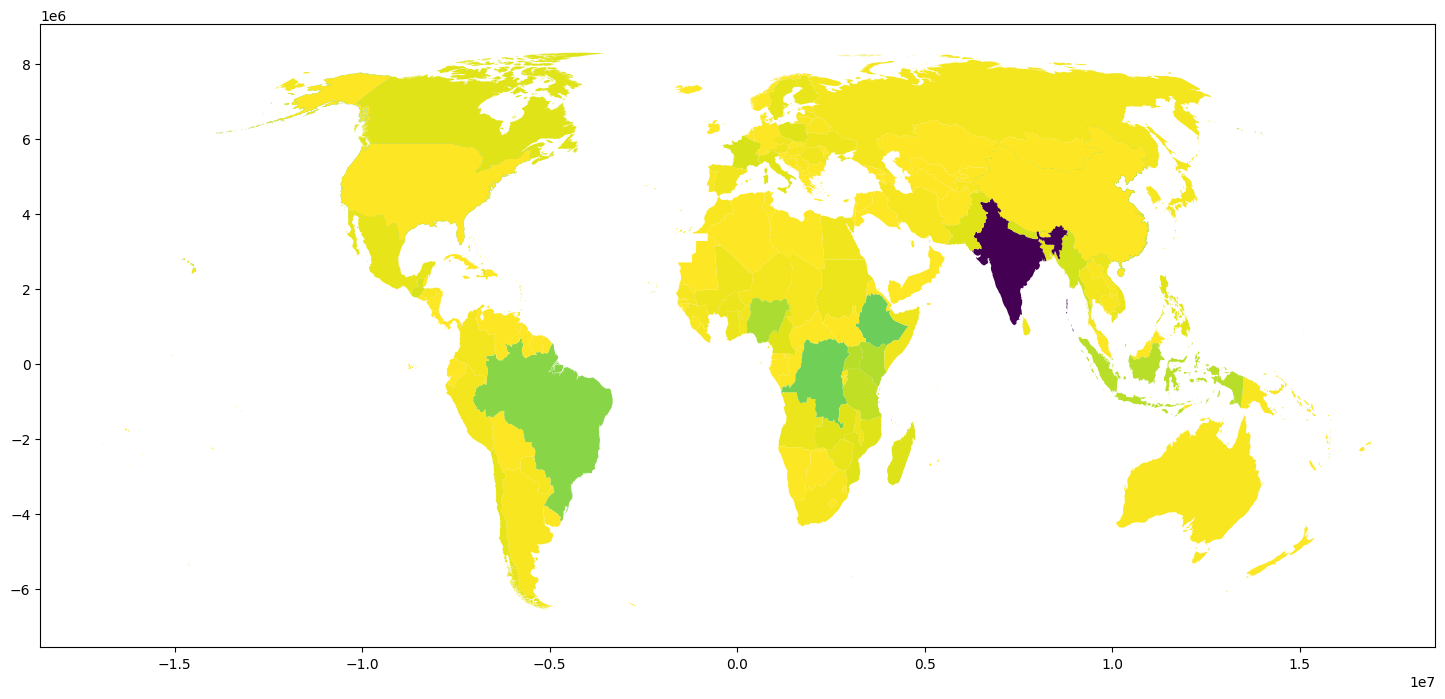

In [471]:
theMapAndData_8857.plot(theMapAndData_8857.Value, cmap='viridis_r',figsize=(18, 14))

* This **IS** a choropleth:

<Axes: >

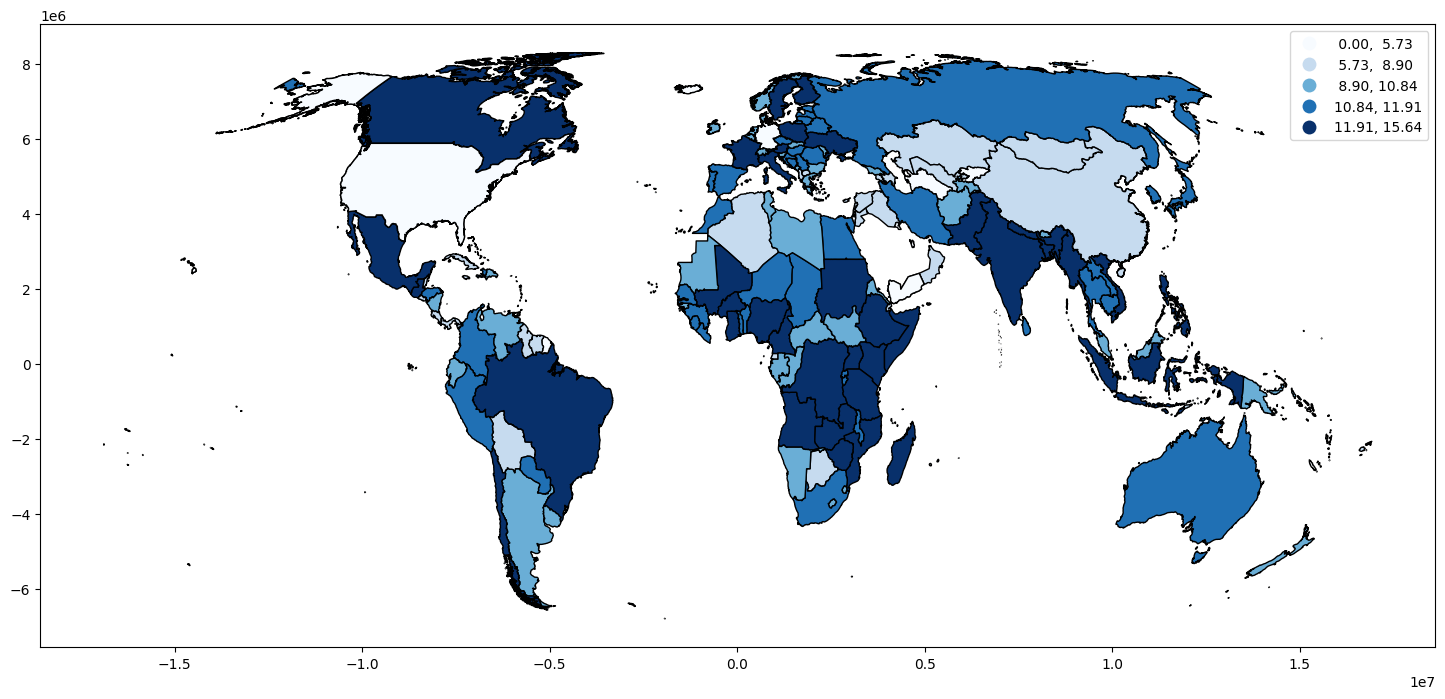

In [472]:
import numpy as np

# Transformación log en columna que existe en el DataFrame con polígonos (no centroides)
theMapAndData_8857['sq_kmGJ'] = np.log1p(theMapAndData_8857['Value'])

# Graficar con polígonos coloreados
theMapAndData_8857.plot(
    column='sq_kmGJ',
    cmap='Blues', # Changed colormap to Blues
    scheme='quantiles',
    k=5,
    legend=True,
    edgecolor='black',
    figsize=(18, 14)
)

### Preprocessing: Discretizing

In [473]:
## do you have these installed?
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.12/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: mapclassify
Version: 2.10.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:


We will discretize this:

In [474]:
theMapAndData_8857['sq_kmGJ'] = theMapAndData_8857.geometry.area / 1e6
theMapAndData_8857['bioenergia_por_km2'] = theMapAndData_8857['Value'] / theMapAndData_8857['sq_kmGJ']


In [475]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar = theMapAndData_8857['Value']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

Let's explore the bining algorithms:

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [476]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

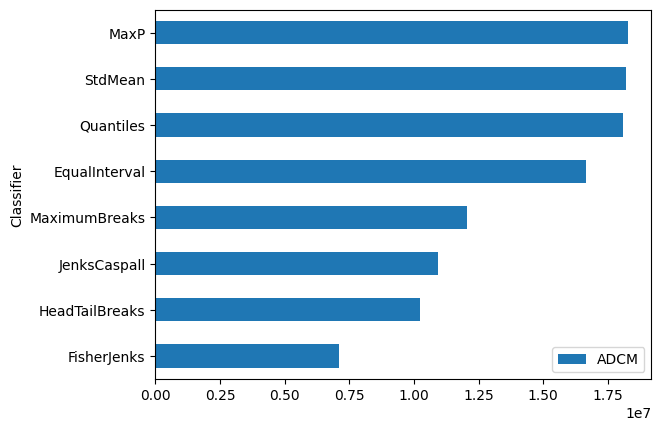

In [477]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [478]:
theMapAndData_8857['Value_density_FJ5'] = fj5.yb

In [479]:
# there you are
theMapAndData_8857[['Value','Value_density_FJ5']].head(20)

,Value,Value_density_FJ5
0,24,0
1,18558,0
2,741,0
3,643,0
4,6155,0
5,5036,0
6,177651,1
7,51134,0
8,69320,0
9,165614,1


We could create a copy of the bins to add labels:

In [480]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

theMapAndData_8857['Value_density_FJ5_cat']=theMapAndData_8857.loc[:,'Value_density_FJ5'].replace(newLabelsForLevels)

# we have
theMapAndData_8857[['Value_density_FJ5','Value_density_FJ5_cat']].head(20)

,Value_density_FJ5,Value_density_FJ5_cat
0,0,0_VeryLow
1,0,0_VeryLow
2,0,0_VeryLow
3,0,0_VeryLow
4,0,0_VeryLow
5,0,0_VeryLow
6,1,1_Low
7,0,0_VeryLow
8,0,0_VeryLow
9,1,1_Low


We are ready for a discrete choropleth:

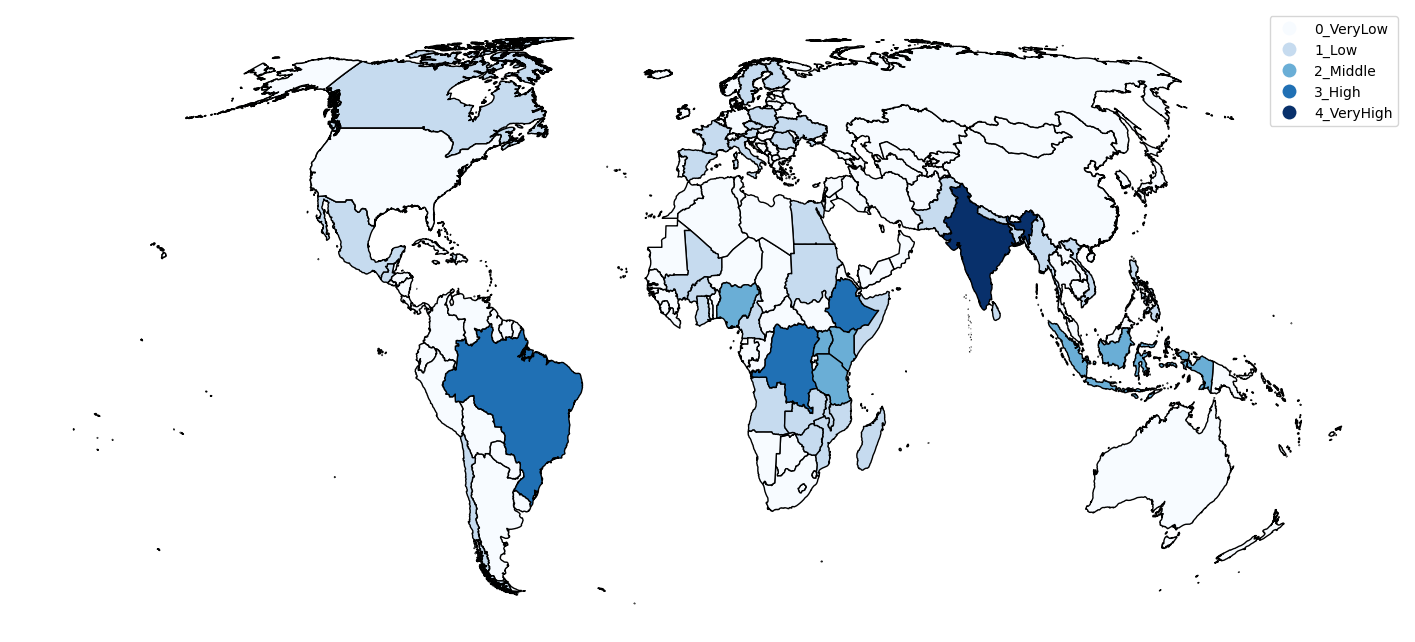

In [481]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(18, 14))
theMapAndData_8857.plot(column='Value_density_FJ5_cat', # variable to plot
                 cmap='Blues', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='black', # border color
                 linewidth=1, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [482]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_4
theMapAndData
world
world_dots
_34
theMapAndData_8857
world_dots_8857
theMapAndData_8857_centroids
_8857
_48
_78
_92
_93
theMapAndData_8857_centroids_out
theMapAndData_8857_centroids_no_out
_108
_109
merged
_158
_176
_177
_240
_264
_295
_309
_310
_326
_344
_375
_389
_390
_420
_451
_465
_466


These are the ones needed in R:

In [483]:
# for choropleth and base map
theMapAndData_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Country                202 non-null    object  
 1   geometry               202 non-null    geometry
 2   Domain Code            202 non-null    object  
 3   Domain                 202 non-null    object  
 4   Area Code (M49)        202 non-null    int64   
 5   Element Code           202 non-null    int64   
 6   Element                202 non-null    object  
 7   Item Code              202 non-null    int64   
 8   Item                   202 non-null    object  
 9   Year Code              202 non-null    int64   
 10  Year                   202 non-null    int64   
 11  Unit                   202 non-null    object  
 12  Value                  202 non-null    int64   
 13  Flag                   202 non-null    object  
 14  Flag Description       202 non-nul

In [484]:
# for DDMs
world_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30421 entries, 0 to 30420
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  30421 non-null  geometry
dtypes: geometry(1)
memory usage: 237.8 KB


In [485]:
# for PSMs
theMapAndData_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Country           202 non-null    object  
 1   geometry          202 non-null    geometry
 2   Domain Code       202 non-null    object  
 3   Domain            202 non-null    object  
 4   Area Code (M49)   202 non-null    int64   
 5   Element Code      202 non-null    int64   
 6   Element           202 non-null    object  
 7   Item Code         202 non-null    int64   
 8   Item              202 non-null    object  
 9   Year Code         202 non-null    int64   
 10  Year              202 non-null    int64   
 11  Unit              202 non-null    object  
 12  Value             202 non-null    int64   
 13  Flag              202 non-null    object  
 14  Flag Description  202 non-null    object  
 15  sq_kmGJ           202 non-null    int64   
 16  sq_kmTJ           

In [486]:
# for PSMs
theMapAndData_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26 entries, 20 to 200
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Country           26 non-null     object  
 1   geometry          26 non-null     geometry
 2   Domain Code       26 non-null     object  
 3   Domain            26 non-null     object  
 4   Area Code (M49)   26 non-null     int64   
 5   Element Code      26 non-null     int64   
 6   Element           26 non-null     object  
 7   Item Code         26 non-null     int64   
 8   Item              26 non-null     object  
 9   Year Code         26 non-null     int64   
 10  Year              26 non-null     int64   
 11  Unit              26 non-null     object  
 12  Value             26 non-null     int64   
 13  Flag              26 non-null     object  
 14  Flag Description  26 non-null     object  
 15  sq_kmGJ           26 non-null     int64   
 16  sq_kmTJ           26 no

In [487]:
# for PSMs
theMapAndData_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 176 entries, 0 to 201
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Country           176 non-null    object  
 1   geometry          176 non-null    geometry
 2   Domain Code       176 non-null    object  
 3   Domain            176 non-null    object  
 4   Area Code (M49)   176 non-null    int64   
 5   Element Code      176 non-null    int64   
 6   Element           176 non-null    object  
 7   Item Code         176 non-null    int64   
 8   Item              176 non-null    object  
 9   Year Code         176 non-null    int64   
 10  Year              176 non-null    int64   
 11  Unit              176 non-null    object  
 12  Value             176 non-null    int64   
 13  Flag              176 non-null    object  
 14  Flag Description  176 non-null    object  
 15  sq_kmGJ           176 non-null    int64   
 16  sq_kmTJ           174 n

The file **africa_8857.gpkg** will keep all those maps as layers!

In [488]:
theMapAndData_8857.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='continent')
theMapAndData_8857.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='Value_ddm')
theMapAndData_8857_centroids.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='Value_psm')
theMapAndData_8857_centroids_out.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='outlier_Value_psm')
theMapAndData_8857_centroids_no_out.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='no_outlier_Value_psm')